In [84]:
%matplotlib inline

Need to Segment the Image into a Foreground and a blob
http://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

/home/schreiverj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


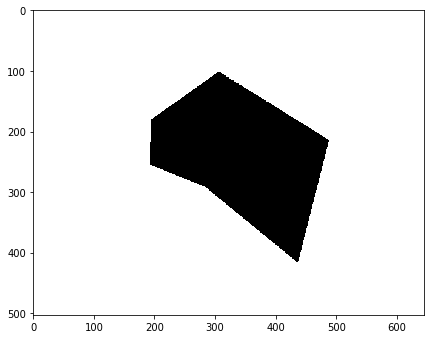

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from scipy import misc

from skimage import feature
from skimage.morphology import watershed

from skimage import data
from skimage.exposure import histogram

img = misc.imread("sample.png")

img = rgb2gray(img)
hist, hist_centers = histogram(img)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)



Use Canny Edge Detection


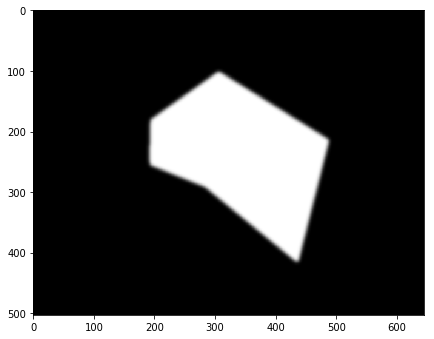

In [104]:
from skimage.feature import canny
from scipy import ndimage as ndi

edges = canny(img)
fill_img = gaussian(ndi.binary_fill_holes(edges),3)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(fill_img, cmap=plt.cm.gray)



[0, 645, 503, 0]

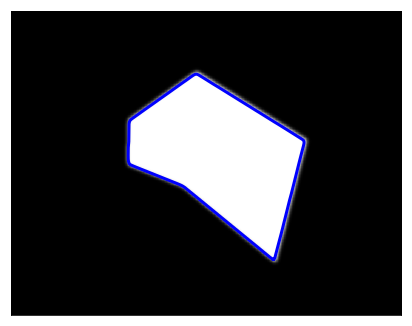

In [105]:
from skimage import measure
s = np.linspace(0, 2*np.pi, 200)
x = 300+250*np.cos(s)
y = 300+250*np.sin(s)
init = np.array([x, y]).T

contours = measure.find_contours(fill_img, 0.8)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(fill_img, cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0] , '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

In [106]:

pointsArray = np.array2string(contours[0], formatter={'float_kind':lambda x: "%.3f" % x}).replace('\n', '').replace(' ', ',')


In [107]:
with open('scad.template', 'r') as file:
    template = file.read()
scadData = template.replace('COOKIE_DATA_HERE',pointsArray)

In [108]:
import viewscad
r = viewscad.Renderer()
r.render(scadData, outfile='sample.stl')

In [109]:
fill_img = detectEdges("sample.png")

NameError: name 'detectEdges' is not defined